In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
data = sio.loadmat('cs.mat')['img']

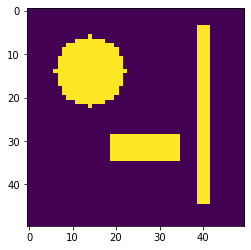

In [3]:
plt.imshow(data)

In [4]:
# Generate noisy data
A = np.random.normal(size=(1300,2500))
eps = np.random.normal(scale=5, size=(1300,))
y = np.matmul(A,data.flatten()) + eps

Alpha = 0.055908101825122285


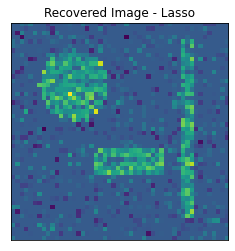

In [5]:
# Generate array of alpha values to test
alphas = np.logspace(-4, 4, 100)

# Lasso
lclf = LassoCV(alphas = alphas, cv = 10).fit(A, y)
lcv_mse = [np.mean(lclf.mse_path_[i,:]) for i in range(len(alphas))]
print('Alpha = {}'.format(lclf.alpha_))
plt.imshow(lclf.coef_.reshape(50,50))
plt.title('Recovered Image - Lasso')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
# Ridge
ridge = Ridge()
params = {'alpha':alphas}
mse_scorer = make_scorer(mean_squared_error)
rclf = GridSearchCV(ridge, params, scoring = mse_scorer, cv=10)
rclf.fit(A, y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04])},
             scoring=make_scorer(mean_squared_error))

In [7]:
rcv_mse = rclf.cv_results_['mean_test_score']

In [8]:
print('Alpha = {}'.format(alphas[np.where(rcv_mse == np.min(rcv_mse))][0]))

Alpha = 200.923300256505


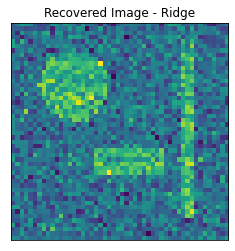

In [9]:
# Fit Ridge model using optimal alpha value from CV and show recovered image
rclf_opt = Ridge(alpha=alphas[np.where(rcv_mse == np.min(rcv_mse))][0]).fit(A, y)

plt.imshow(rclf_opt.coef_.reshape(50,50))
plt.title('Recovered Image - Ridge')
plt.xticks([])
plt.yticks([])
plt.show('Recovered Image - Ridge.jpg')

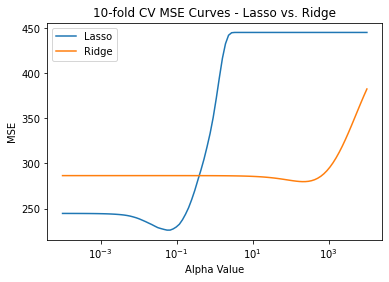

In [10]:
# Plot CV MSE curves for Lasso and Ridge
plt.plot(alphas, lcv_mse[::-1], label='Lasso')
plt.plot(alphas, rcv_mse, label='Ridge')
plt.xscale('log')
plt.xlabel('Alpha Value')
plt.ylabel('MSE')
plt.title('10-fold CV MSE Curves - Lasso vs. Ridge')
plt.legend()
plt.show()